# COMANDO DA QUESTÃO A
Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

Para gerar o histograma, vou utilizar o Iris dataset famoso por ser usado em ML (Machine Learning) e por ter uma estrutura simples e informativa para tarefas de classificação. As classes utilizadas de exemplo foram três espécies de Iris: Iris Setosa, Iris Versicolor e Iris Virginica. Já as features, foram quatro medidas contínuas para cada amostra: Comprimento da sépala (sepal length), largura da sépala (sepal width), compirmento da petala (petal length) e lagura da petala (petal width).

O código abaixo carrega o Iris dataset usando o ``sklearn`` e gera histogramas dos dois atributos para cada classe e repete o procedimento para dois tamanhos de bins.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# Carrega o Iris dataset
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names
feature_names = data.feature_names

# Seleciona as duas features: index 2 -> petal length, index 3 -> petal width
features_idx = [2, 3]

# Define dois conjuntos de bin sizes
bin_sizes = [10, 20]

for bins in bin_sizes:
    # Cria uma figura com 2 linhas (uma para cada feature) e 3 colunas (uma para cada classe)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
    fig.suptitle(f'Histograma para cada classe usando {bins} bins', fontsize=16)
    
    for i, feature in enumerate(features_idx):
        for j, target in enumerate(np.unique(y)):
            ax = axes[i, j]
            # Filtra os dados da feature para a classe j
            data_feature = X[y == target, feature]
            ax.hist(data_feature, bins=bins, color='skyblue', edgecolor='black')
            ax.set_title(f'{target_names[target].capitalize()} - {feature_names[feature]}')
            ax.set_xlabel(feature_names[feature])
            ax.set_ylabel('Frequência')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

O que o código faz é carregar o Iris dataset com ```load_iris()``` e depois selecionamos *petal length* e *petal width* (os índices 2 e 3, respectivamente) para analisarmos.

Para cada valor de bins definido (10 e 20), o código cria uma figura com subplots organizados em 2 linhas (uma para cada feature) e 3 colunas (uma para cada classe). Cada subplot mostra o histograma da distribuição da feature para uma classe específica.



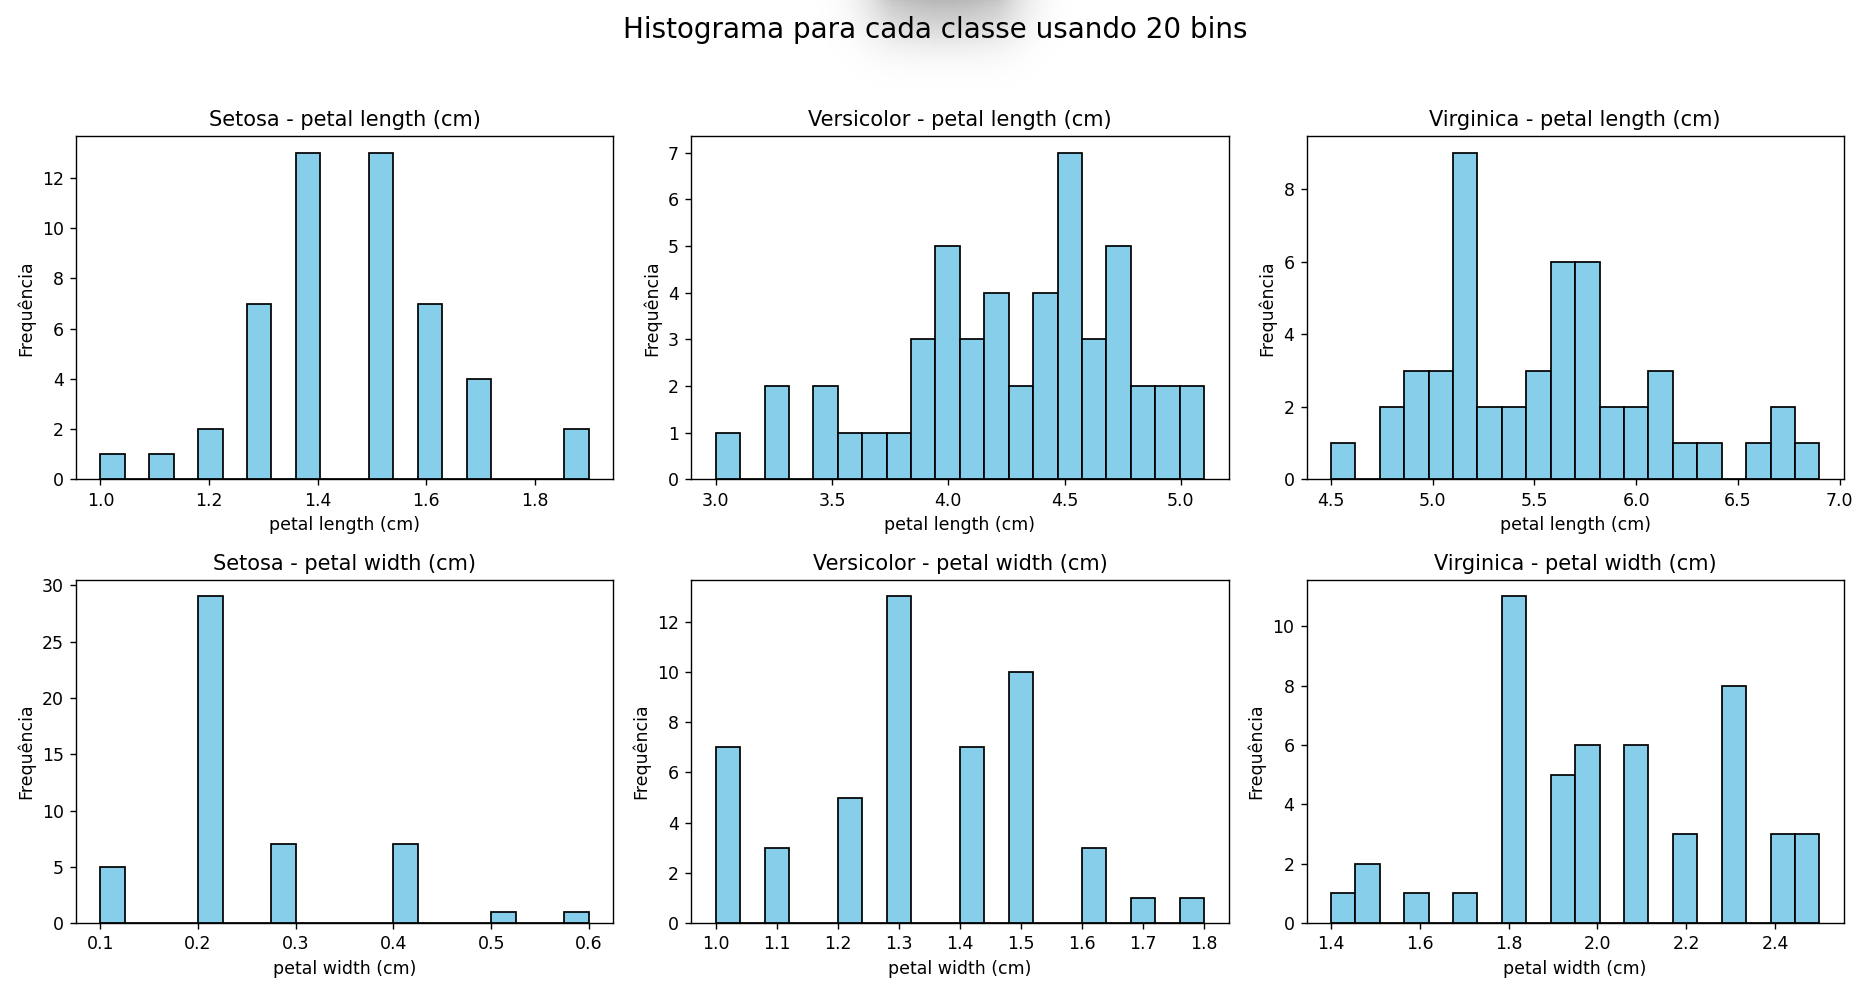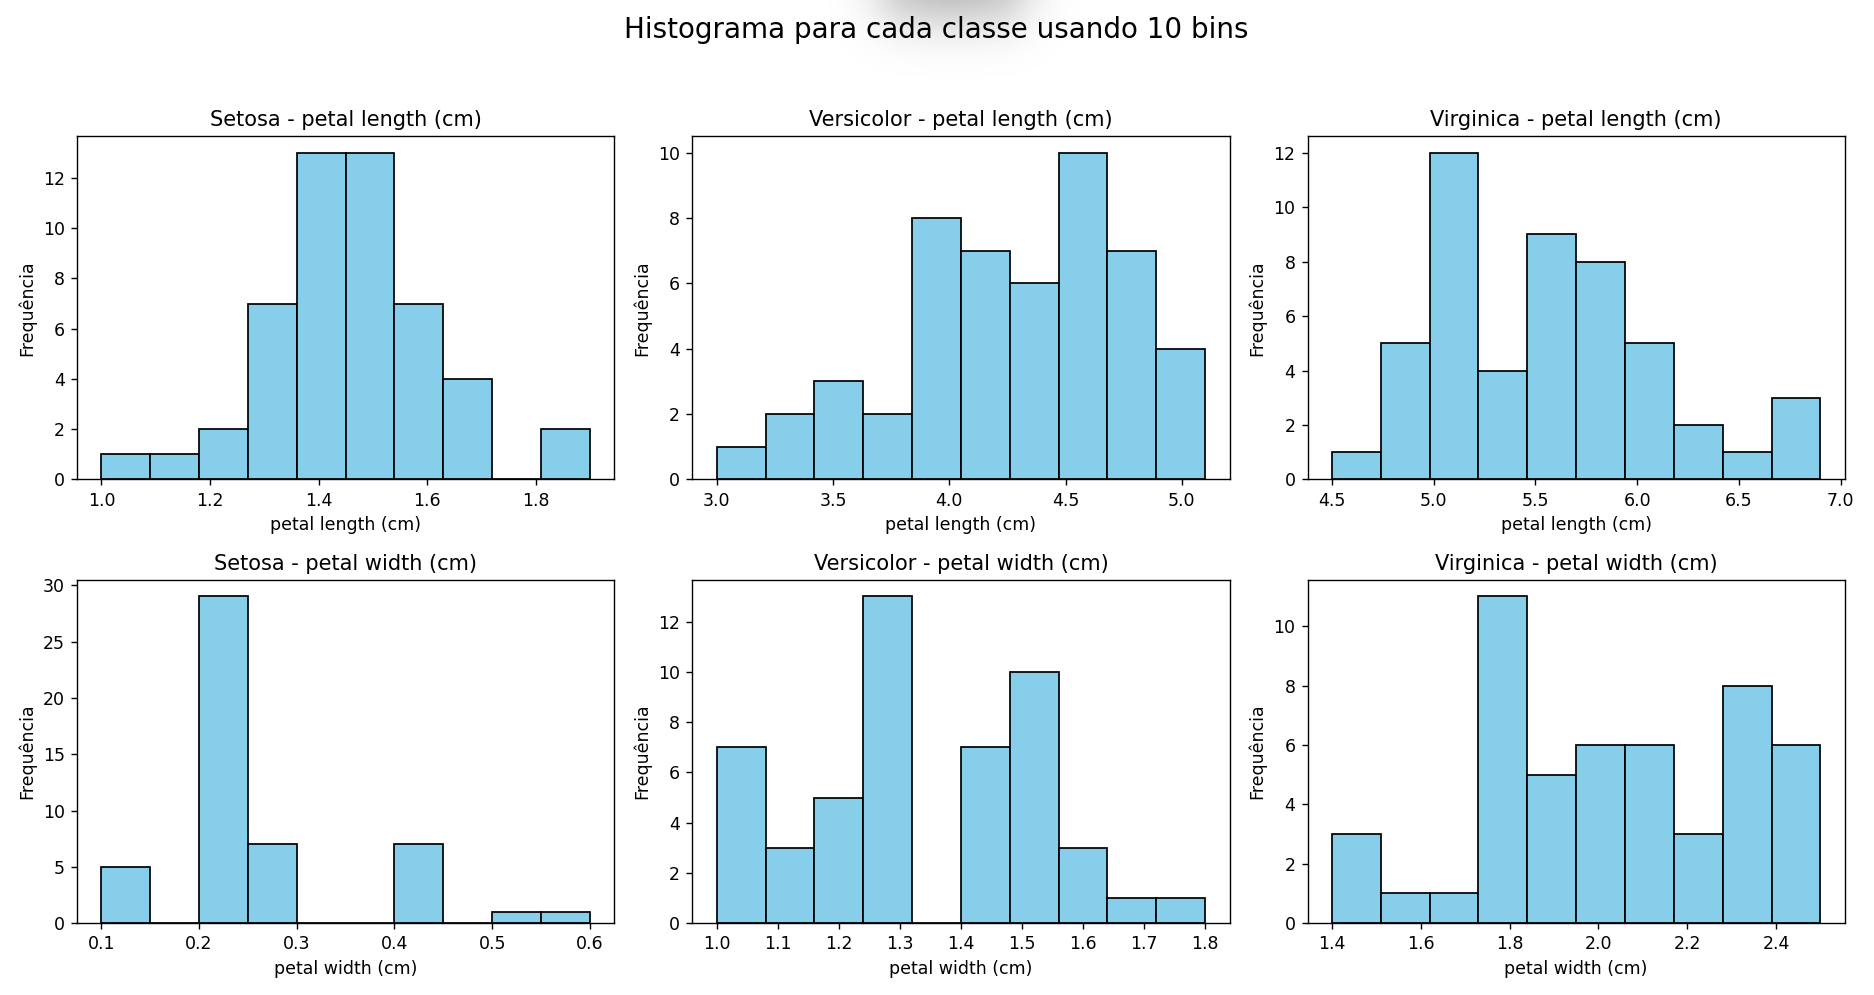

Ao comparar os histogramas para *petal length* e *petal width* entre as classes, percebe-se que, por exemplo, a classe *Iris-setosa* possui valores significativamente menores para ambas as medidas em comparação com *versicolor* e *virginica*. Essa disparidade torna essas features excelentes candidatas para separar setosa de outras classes. Por outro lado, os histogramas de *versicolor* e *virginica* tendem a ter uma sobreposição maior, indicando que, para essa faixa de valores, outras técnicas ou combinações de features podem ser necessárias para uma classificação mais acurada.

Se observamos grande sobreposição de histogramas para determinadas features entre classes, isso pode indicar que a feature isoladamente terá baixa capacidade discriminativa. Em decorrência, modelos de classificação precisarão de outras informações (ou de mais features) para diminuir essa ambiguidade. Essa análise exploratória é essencial antes de se construir e ajustar modelos de aprendizado de máquina.

Uma vantagem de Bins com tamanho menor oferecem uma visão mais "suavizada" da distribuição, facilitando a identificação de tendências gerais e reduzem o impacto de flutuações pontuais ou ruídos nos dados.Entretanto, podem esconder detalhes importantes, como picos e caudas específicas, que poderiam ser relevantes para detectar subtilezas entre as classes.
Já os Bins de tamanho maior revelam detalhes mais finos, mostrando picos locais e variações sutis na distribuição, podendo ajudar a identificar se há subgrupos ou divisões internas dentro de uma classe. No entanto, podem acentuar o ruído dos dados, dificultando a apresentação de uma visão global e aumentando a dispersão visual dos histogramas.

Em resumo, o ajuste dos tamanhos dos bins é um trade-off: nós queremos detalhes suficientes para identificar padrões relevantes que ajudem na classificação, mas não tanto que o gráfico fique "ruidoso" e difícil de interpretar. Uma boa prática é testar diferentes tamanhos e visualizar os histogramas para captar tanto a tendência geral quanto detalhes importantes da distribuição.

